# MNIST KNN and CNN
Practice on MNIST dataset  
Using a KNN classifier as a first attempt  
Then uses a simple CNN to classify  

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# KNN Classifier Attempt

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
y= df['label']
X = df.drop(columns='label')

**Normalizing data**  
Dividing pixels by max of 255

In [7]:
X /= 255

In [8]:
clf = KNeighborsClassifier()

In [9]:
scores = cross_val_score(clf, X, y)
print(scores)

[0.96797619 0.96559524 0.96345238 0.96333333 0.96892857]


**Initial evaluation of KNN Classifier**  
Average value of 96.5%

In [10]:
scores.mean()

0.965857142857143

# CNN Attempt

In [11]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [12]:
inputs = keras.Input(shape=(784,))
#already rescaled from sklearn workflow
#x = layers.Rescaling(1./255)
x = layers.Reshape((28,28,1))(inputs)
x = layers.Conv2D(32,(3,3),activation='relu')(x)
x = layers.MaxPool2D((2,2))(x)
x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.MaxPool2D((2,2))(x)
x = layers.Conv2D(128,(3,3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

In [13]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [14]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                   

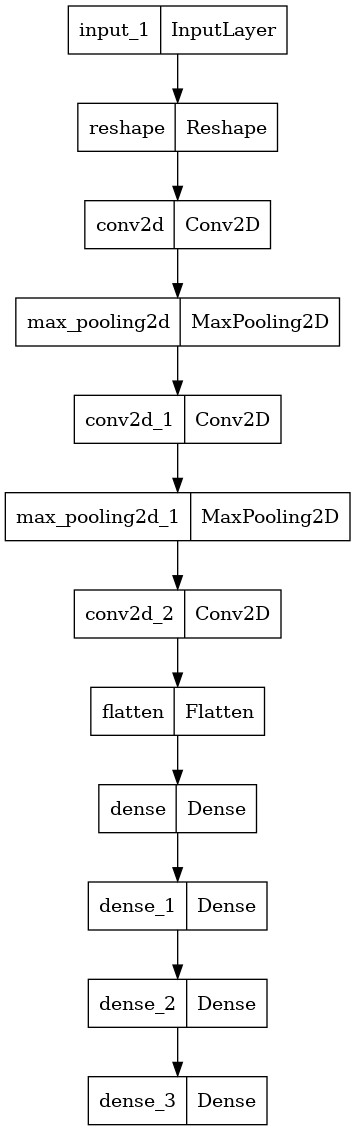

In [15]:
keras.utils.plot_model(model, "mnist_model.png")

In [16]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

**Callback**  
Looking at past 5 epochs, select best one when val_loss stops improving

In [17]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [18]:
history = model.fit(X, y, epochs=100, validation_split=0.2, callbacks=[callback])

Epoch 1/100
1050/1050 [==============================] - 16s 6ms/step - loss: 0.2055 - accuracy: 0.9337 - val_loss: 0.0821 - val_accuracy: 0.9754
Epoch 2/100
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0596 - accuracy: 0.9813 - val_loss: 0.0530 - val_accuracy: 0.9837
Epoch 3/100
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0433 - accuracy: 0.9867 - val_loss: 0.0476 - val_accuracy: 0.9856
Epoch 4/100
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.0495 - val_accuracy: 0.9851
Epoch 5/100
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0594 - val_accuracy: 0.9833
Epoch 6/100
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0455 - val_accuracy: 0.9877
Epoch 7/100
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0786 - val_a

In [19]:
test /= 255

In [20]:
y_pred = model.predict(test)

875/875 [==============================] - 2s 2ms/step


In [21]:
y_pred_cls = tf.argmax(y_pred, axis=1)
y_pred_cls

<tf.Tensor: shape=(28000,), dtype=int64, numpy=array([2, 0, 9, ..., 3, 9, 2])>

In [22]:
from matplotlib import pyplot as plt

tf.Tensor(2, shape=(), dtype=int64)


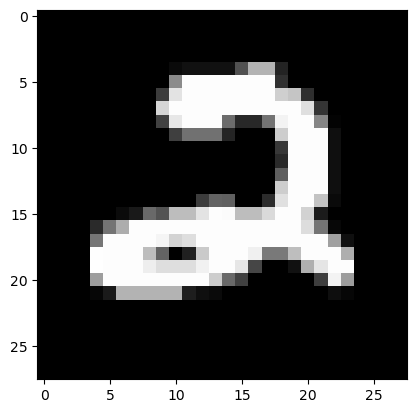

tf.Tensor(0, shape=(), dtype=int64)


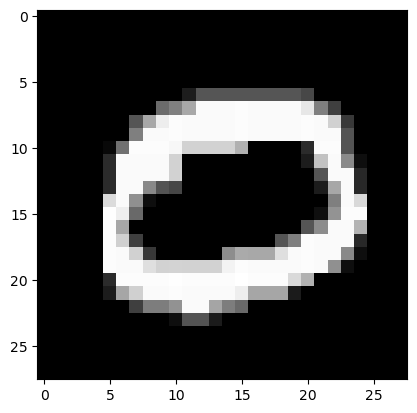

tf.Tensor(9, shape=(), dtype=int64)


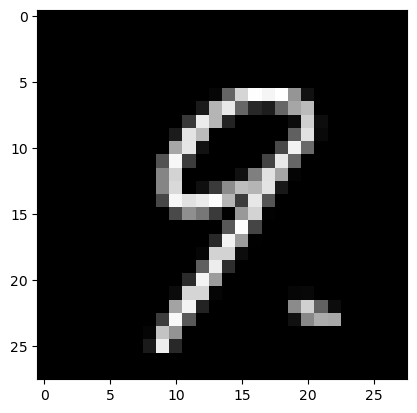

tf.Tensor(9, shape=(), dtype=int64)


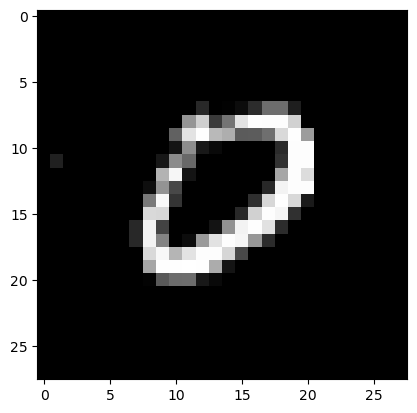

tf.Tensor(3, shape=(), dtype=int64)


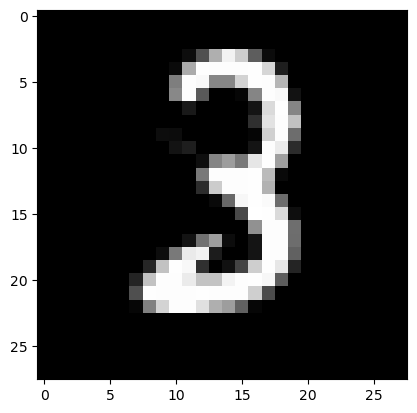

tf.Tensor(7, shape=(), dtype=int64)


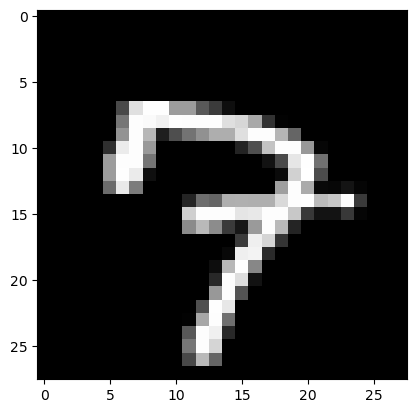

tf.Tensor(0, shape=(), dtype=int64)


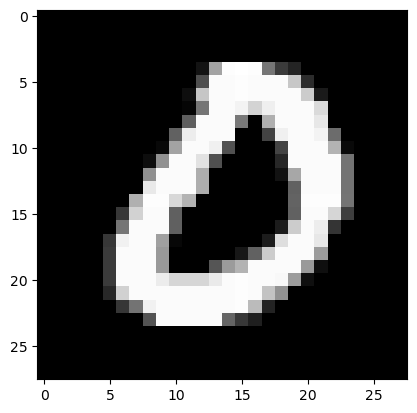

tf.Tensor(3, shape=(), dtype=int64)


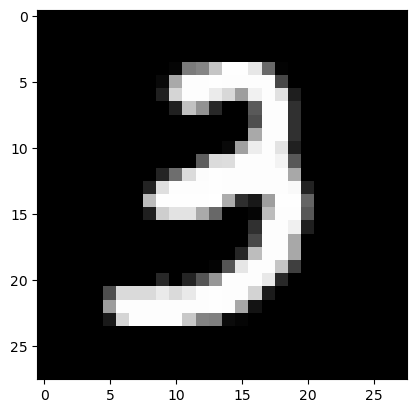

tf.Tensor(0, shape=(), dtype=int64)


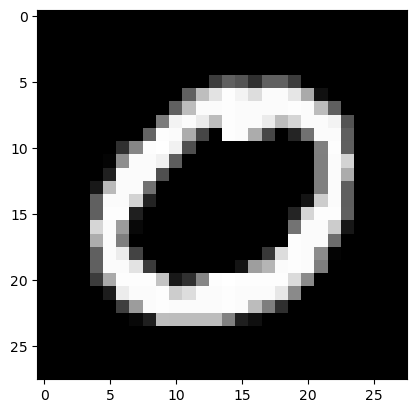

tf.Tensor(3, shape=(), dtype=int64)


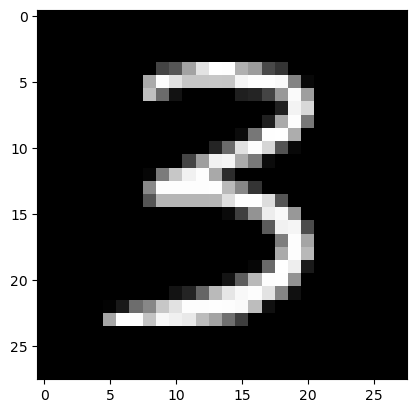

In [23]:
for i in range(0,10):
    print(y_pred_cls[i])
    image = np.array(test.iloc[i], dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [24]:
ans = pd.DataFrame(y_pred_cls)

In [25]:
pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [26]:
ans["ImageId"] = ans.index + 1 

In [27]:
ans = ans.rename(columns={0:"Label"})[["ImageId","Label"]]
ans

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [28]:
ans.to_csv("submissions.csv",index=False)